<a href="https://colab.research.google.com/github/Cebedeo/03MAIR---Algoritmos-de-optimizacion---2019-Enrique-Navarro-/blob/master/Enrique_Navarro_AG2_de_Optimizaci%C3%B3n_de_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad guiada 2 de Enrique Navarro**

Disponible en CO en este enlace: https://colab.research.google.com/drive/1rZRLLvGTrK046FZ90pV72XimXeZrDHN7



1. Viaje por el río - Programación dinámica

In [2]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

def Precios(TARIFAS):
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']

La ruta es:


'0,0,2,5'

2. Problema de asignación de tarea


In [2]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3),COSTES)



73

**Resolución por la fuerza bruta**

In [8]:
import time
import itertools
from random import randrange

# Añado una función para crear automáticamente los COSTES del tamaño que reciba como parámetro
def crear_costes(n):  
  costes = []
  for i in range(n):
    tmp_vec = []
    for j in range(n):
      tmp_vec.append(randrange(50))
    costes.append(tmp_vec)
  return costes

# Y a picar piedra
def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    #print(s,valor(s,COSTES))
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  
  print("La mejor solución es: ",mejor_solucion," con valor:",mejor_valor)

COSTES2 = crear_costes(10)
#print("Costes de la iteración: ",COSTES2)
start = time.time()
fuerza_bruta(COSTES2)
end = time.time()
print("La ejecución ha consumido ",end-start,"segundos")

La mejor solución es:  (9, 3, 8, 0, 5, 4, 2, 6, 1, 7)  con valor: 65
La ejecución ha consumido  4.74428653717041 segundos


**Práctica de ramificación y poda**

In [24]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(COSTES) ):
    if i not in S:
      VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

#Coste superior para soluciones parciales
def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range(  len(COSTES)   ):
    if i not in S:
      VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
    #print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )

for i in range(10,20):
  COSTES2 = crear_costes(i)
  start = time.time()
  ramificacion_y_poda(COSTES2)
  end = time.time()
  print("La ejecución para dimensión",i,"ha consumido ",end-start,"segundos")

La ejecución para dimensión 10 ha consumido  0.021632671356201172 segundos
La ejecución para dimensión 11 ha consumido  0.021965742111206055 segundos
La ejecución para dimensión 12 ha consumido  1.9708101749420166 segundos
La ejecución para dimensión 13 ha consumido  0.07907414436340332 segundos
La ejecución para dimensión 14 ha consumido  0.08124947547912598 segundos
La ejecución para dimensión 15 ha consumido  0.19988346099853516 segundos
La ejecución para dimensión 16 ha consumido  0.37610507011413574 segundos
La ejecución para dimensión 17 ha consumido  3.612288236618042 segundos
La ejecución para dimensión 18 ha consumido  115.62923955917358 segundos
La ejecución para dimensión 19 ha consumido  1478.1071503162384 segundos


**Análisis para mejorar nota**<br>
La complejidad del algoritmo de fuerza bruta es n!<br>
Las matrices se generan con la función crear_costes(dimensión_de_la_matriz).<br>
Fuerza bruta deja de ser práctico a partir de la dimensión 10 (4 segundos y medio) u 11 (54 segundos).<br>
Para ramificación y poda se probó el valor que sugerí durante la clase, dimensión 30. Ha resultado ser claramente excesivo, tras varios minutos me he visto obligado a detener la ejecución.<br>
Para poder comparar, finalmente se lanza con un bucle para dimensiones de 10 a 14.<br>
**Conclusión**<br>
Aunque debido a la generación aleatoria de los costes en cada iteración los tiempos varían, en general a partir de la dimensión 13 se va a varios segundos (habiendo llegado a ser 43) por lo que diremos que en dimensión 13 deja de ser práctico para una aplicación en tiempo real, mientras que realmente útil es difícil aventurarse, se ha probado con dimensión hasta 20 y la variación de resultados es enorme (dimensión 16, resuelta en 0.376 segundos, ¡o 220 segundos!), por lo que yo diría que en algún lugar entre 18 y 20 dimensiones la posibilidad de que el tiempo necesario sea excesivo es ya muy alta.



**Descenso de gradiente**

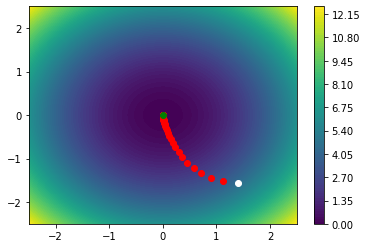

Solucion: [-0.004999999999999998, -0.005000000000000004] 5.000000000000002e-05


In [32]:
import math                     #Funciones matemáticas
import matplotlib.pyplot as plt #Generación de gráficos (otra opción es seaborn)
import numpy as np              #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

#La función a minimizar: paraboloide
f  = lambda X: X[0]**2+X[1]**2  #Funcion
df = lambda X: [2*X[0], 2*X[1]] #Gradiente

########### Función del ejercicio siguiente, incorporada aquí #############
#Definimos la funcion
#sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x +1 - E^y)
#f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 +3) * np.cos(2 * X[0] +1 - np.e**X[1])

#¿Y el gradiente?
#Aproximamos el valor del gradiente en un punto por su definición
# def df(PUNTO):
#   h = 0.01
#   T = np.copy(PUNTO)
#   grad = np.zeros(2)
#   for it, th in enumerate(PUNTO):
#     T[it] = T[it]+h
#     grad[it] = (f(T) - f(PUNTO)) / h
#   return grad


#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio
P=[random.uniform(-2,2 ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Iteramos el algoritmo
#Tasa de aprendizaje
TA=.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Pintamos el gráfico con las iteraciones
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**Otra función a minimizar**


In [0]:
#Definimos la funcion
#sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x +1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 +3) * np.cos(2 * X[0] +1 - np.e**X[1])

#¿Y el gradiente?
#Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it]+h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

###### Nota: se incorpora este código al anterior comentado para no duplicar tanto código.